# Focusing specifically on G-quadruplexes in Flanking Regions

In [9]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/all_combined_quadron_results_MEI_flanks_with_TE_designations.csv')

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# 1. Total number of G quadruplexes (rows in the DataFrame after removing NA)
total_g4s = len(df)

# 2. Count stable and non-stable G quadruplexes based on the Q column
stable_count = df[df['Q'] > 19].shape[0]
non_stable_count = df[df['Q'] <= 19].shape[0]

# Print the results
print("Total number of G quadruplexes found in the flanks:", total_g4s)
print("Number of stable G quadruplexes (Q > 19):", stable_count)
print("Number of non-stable G quadruplexes (Q <= 19):", non_stable_count)

# 3. Aggregate by sample and sum the lengths
sample_aggregated = df.groupby('Sample').agg(Total_Length=('L', 'sum')).reset_index()

# Calculate the mean of the summed coverage values
mean_coverage = sample_aggregated['Total_Length'].mean()
print("\nMean of summed coverage values:", mean_coverage)

# 4. Categorize SVs into low, medium, and high non-B coverage based on total length
def categorize_coverage(length):
    if length <= 500:
        return 'Low Non-B Coverage (0-500)'
    elif 500 < length <= 1000:
        return 'Medium Non-B Coverage (500-1000)'
    elif length > 1000:
        return 'High Non-B Coverage (1000-2000)'

sample_aggregated['Coverage_Category'] = sample_aggregated['Total_Length'].apply(categorize_coverage)

# 5. Count the number of SVs in each category
coverage_counts = sample_aggregated['Coverage_Category'].value_counts()

# Print the categorized counts
print("\nCounts of SVs by Non-B Coverage Category:")
print(coverage_counts)

# Save the categorized results to a CSV file
output_file = '/home/alextu/scratch/aggregated_mei_coverage.csv'
sample_aggregated.to_csv(output_file, index=False)
print(f"\nAggregated SV coverage results saved to: {output_file}")

Total number of G quadruplexes found in the flanks: 76510
Number of stable G quadruplexes (Q > 19): 37683
Number of non-stable G quadruplexes (Q <= 19): 38827

Mean of summed coverage values: 47.86090044433341

Counts of SVs by Non-B Coverage Category:
Coverage_Category
Low Non-B Coverage (0-500)          55941
Medium Non-B Coverage (500-1000)       97
High Non-B Coverage (1000-2000)         1
Name: count, dtype: int64

Aggregated SV coverage results saved to: /home/alextu/scratch/aggregated_mei_coverage.csv


In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/all_combined_quadron_results_MEI_flanks_with_TE_designations.csv')

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# 1. Total number of G quadruplexes (rows in the DataFrame after removing NA)
total_g4s = len(df)

# 2. Count stable and non-stable G quadruplexes based on the Q column
stable_count = df[df['Q'] > 19].shape[0]
non_stable_count = df[df['Q'] <= 19].shape[0]

# Print the results
print("Total number of G quadruplexes found in the flanks:", total_g4s)
print("Number of stable G quadruplexes (Q > 19):", stable_count)
print("Number of non-stable G quadruplexes (Q <= 19):", non_stable_count)

# 3. Aggregate by sample and sum the lengths, keeping te_designation
sample_aggregated = df.groupby(['Sample', 'te_designation']).agg(
    Total_Length=('L', 'sum')
).reset_index()

# Calculate the mean of the summed coverage values
mean_coverage = sample_aggregated['Total_Length'].mean()
print("\nMean of summed coverage values:", mean_coverage)

# 4. Categorize SVs into low, medium, and high non-B coverage based on total length
def categorize_coverage(length):
    if length <= 500:
        return 'Low Non-B Coverage (0-500)'
    elif 500 < length <= 1000:
        return 'Medium Non-B Coverage (500-1000)'
    elif length > 1000:
        return 'High Non-B Coverage (1000-2000)'

sample_aggregated['Coverage_Category'] = sample_aggregated['Total_Length'].apply(categorize_coverage)

# 5. Count the number of SVs in each category
coverage_counts = sample_aggregated['Coverage_Category'].value_counts()

# Print the categorized counts
print("\nCounts of SVs by Non-B Coverage Category:")
print(coverage_counts)

# Save the categorized results to a CSV file, including te_designation
output_file = '/home/alextu/scratch/aggregated_meiflank_coverage_gquads.csv'
sample_aggregated.to_csv(output_file, index=False)
print(f"\nAggregated SV coverage results with te_designation saved to: {output_file}")

Total number of G quadruplexes found in the flanks: 76510
Number of stable G quadruplexes (Q > 19): 37683
Number of non-stable G quadruplexes (Q <= 19): 38827

Mean of summed coverage values: 47.86090044433341

Counts of SVs by Non-B Coverage Category:
Coverage_Category
Low Non-B Coverage (0-500)          55941
Medium Non-B Coverage (500-1000)       97
High Non-B Coverage (1000-2000)         1
Name: count, dtype: int64

Aggregated SV coverage results with te_designation saved to: /home/alextu/scratch/aggregated_meiflank_coverage_gquads.csv


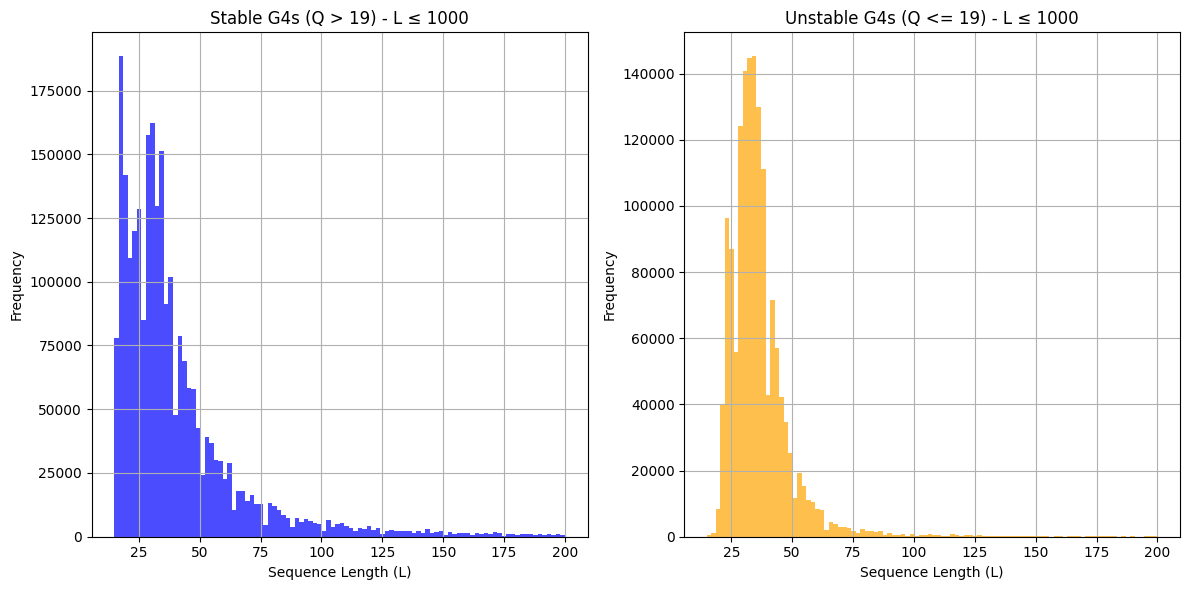

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/scratch-old/alextu/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv'
df = pd.read_csv(file_path)

# Drop rows where the Q value is NA
df.dropna(subset=['Q'], inplace=True)

# Categorize stability
df['Stability'] = df['Q'].apply(lambda x: 'Stable (Q > 19)' if x > 19 else 'Unstable (Q <= 19)')

# Ensure L is numeric and drop missing
df['L'] = pd.to_numeric(df['L'], errors='coerce')
df.dropna(subset=['L'], inplace=True)

# **Filter** to L ≤ 1000
df = df[df['L'] <= 200]

# Separate data for stable and unstable G4s
stable_lengths = df.loc[df['Stability'] == 'Stable (Q > 19)', 'L']
unstable_lengths = df.loc[df['Stability'] == 'Unstable (Q <= 19)', 'L']

# Plot histograms separately
plt.figure(figsize=(12, 6))

# Stable G4s
plt.subplot(1, 2, 1)
plt.hist(stable_lengths, bins=100, alpha=0.7, color='blue')
plt.title('Stable G4s (Q > 19) - L ≤ 1000')
plt.xlabel('Sequence Length (L)')
plt.ylabel('Frequency')
plt.grid(True)

# Unstable G4s
plt.subplot(1, 2, 2)
plt.hist(unstable_lengths, bins=100, alpha=0.7, color='orange')
plt.title('Unstable G4s (Q <= 19) - L ≤ 1000')
plt.xlabel('Sequence Length (L)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

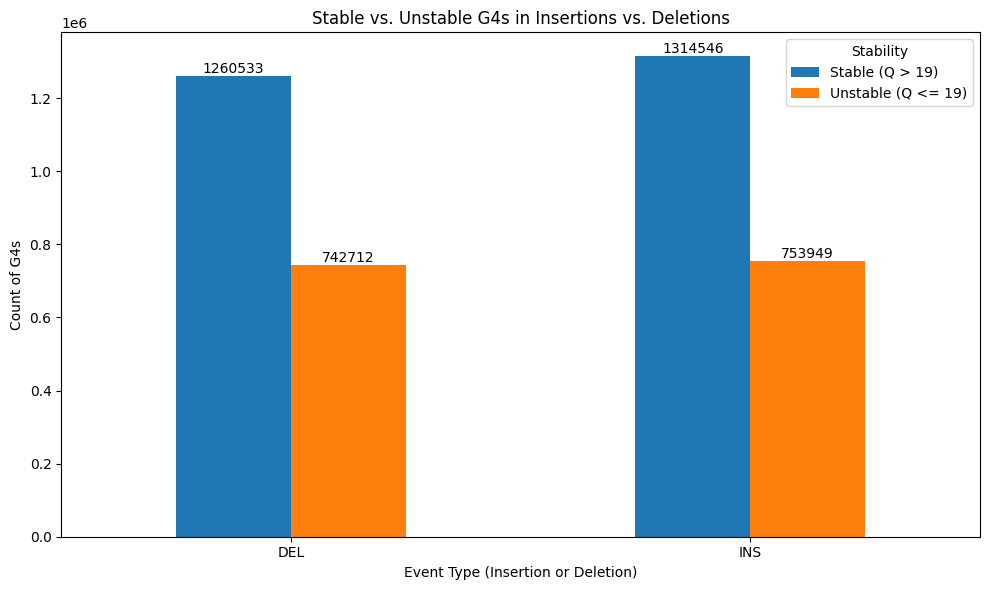

Mean length (L) of stable G4s: 48.32
Mean length (L) of unstable G4s: 38.22


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/home/alextu/scratch/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# Add a new column to categorize stability
df['Stability'] = df['Q'].apply(lambda x: 'Stable (Q > 19)' if x > 19 else 'Unstable (Q <= 19)')

# Extract event types from the file names (INS/DEL) for categorization
df['Event_Type'] = df['Sample'].str.extract(r'_(INS|DEL)_')[0]

# Count stable and unstable G4s by event type
stability_counts = df.groupby(['Event_Type', 'Stability']).size().unstack(fill_value=0)

# Plotting
ax = stability_counts.plot(kind='bar', figsize=(10, 6), stacked=False)
plt.title('Stable vs. Unstable G4s in Insertions vs. Deletions')
plt.xlabel('Event Type (Insertion or Deletion)')
plt.ylabel('Count of G4s')
plt.xticks(rotation=0)
plt.legend(title='Stability')
plt.tight_layout()

# Add counts to the bars
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x-coordinate
                height,  # y-coordinate
                f'{int(height)}',  # label text
                ha='center', va='bottom', fontsize=10  # alignment and style
            )

plt.show()

# Ensure L column is numeric
df['L'] = pd.to_numeric(df['L'], errors='coerce')

# Calculate mean length (L) for stable and unstable G4s
mean_length_stable = df[df['Stability'] == 'Stable (Q > 19)']['L'].mean()
mean_length_unstable = df[df['Stability'] == 'Unstable (Q <= 19)']['L'].mean()

# Print the results
print(f"Mean length (L) of stable G4s: {mean_length_stable:.2f}")
print(f"Mean length (L) of unstable G4s: {mean_length_unstable:.2f}")

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import binomtest

# ---------------------------------------------------------------------
# 1) LOAD DATA
# ---------------------------------------------------------------------
file_path = '/scratch-old/alextu/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv'
df = pd.read_csv(file_path)

# ---------------------------------------------------------------------
# 2) PREPROCESS
#    - Drop rows where Q is NA
#    - Define stability (Q>19 => stable)
#    - Extract Event_Type (INS or DEL)
# ---------------------------------------------------------------------
df.dropna(subset=['Q'], inplace=True)

df['Stability'] = df['Q'].apply(lambda x: 'Stable (Q > 19)' if x > 19 else 'Unstable (Q <= 19)')

# Extract the event type from the Sample column (assuming it has '_INS_' or '_DEL_')
df['Event_Type'] = df['Sample'].str.extract(r'_(INS|DEL)_')[0]

# ---------------------------------------------------------------------
# 3) FUNCTION TO RUN BINOM TEST AND PRINT RESULTS
# ---------------------------------------------------------------------
def run_binom_test(subset_df, group_label):
    stable_count = (subset_df['Stability'] == 'Stable (Q > 19)').sum()
    total_count = len(subset_df)
    if total_count == 0:
        print(f"No data found for {group_label}")
        return
    
    prop_stable = stable_count / total_count
    result = binomtest(k=stable_count, n=total_count, p=0.5, alternative='greater')

    print(f"\n=== {group_label} ===")
    print(f"Total G4s: {total_count}")
    print(f"Number stable: {stable_count}")
    print(f"Proportion stable: {prop_stable:.3f}")
    print(f"Binomial test p-value (Ha: proportion stable > 0.5) = {result.pvalue:.5g}")
    if result.pvalue < 0.05:
        print("=> Reject H0; stable G4s are significantly more than 50% (p < 0.05).")
    else:
        print("=> Do not reject H0; no significant evidence that stable G4s exceed 50%.")

# ---------------------------------------------------------------------
# 4) RUN TESTS SEPARATELY FOR INS AND DEL
# ---------------------------------------------------------------------
df_ins = df[df['Event_Type'] == 'INS']
df_del = df[df['Event_Type'] == 'DEL']

run_binom_test(df_ins, "Insertions (INS)")
run_binom_test(df_del, "Deletions (DEL)")


=== Insertions (INS) ===
Total G4s: 2068495
Number stable: 1314546
Proportion stable: 0.636
Binomial test p-value (Ha: proportion stable > 0.5) = 0
=> Reject H0; stable G4s are significantly more than 50% (p < 0.05).

=== Deletions (DEL) ===
Total G4s: 2003245
Number stable: 1260533
Proportion stable: 0.629
Binomial test p-value (Ha: proportion stable > 0.5) = 0
=> Reject H0; stable G4s are significantly more than 50% (p < 0.05).


Dataset loaded successfully.

Initial Data:
                                              Sample   POS STR   L      Q  \
0  flanking_sequences_HG00733_hap2_chr10_1006437-...  1307   -  32  34.02   
1  flanking_sequences_HG00733_hap2_chr10_10065626...   148   +  45  25.93   
2  flanking_sequences_HG00733_hap2_chr10_10069719...   818   -  33  30.19   
3  flanking_sequences_HG00733_hap2_chr10_10069746...   562   -  33  30.19   
4  flanking_sequences_HG00733_hap2_chr10_10072070...   554   -  19  30.56   

                                        SEQUENCE  
0               CCCCCTTCCCGCCGCCTCCCCCCACCCACCCC  
1  GGGGACTGTGGTGGGGTCGGGGGAGGGGGGAGGGATAGCATTGGG  
2              CCCTCCCCTCGCCCCTCACTCCCCAACAGGCCC  
3              CCCTCCCCTCGCCCCTCACTCCCCAACAGGCCC  
4                            CCCCCCCCACCTCCCTCCC  

Data after extracting flanks:
                                              Sample       Flank
0  flanking_sequences_HG00733_hap2_chr10_1006437-...   pre_flank
1  flanking_sequences_HG00

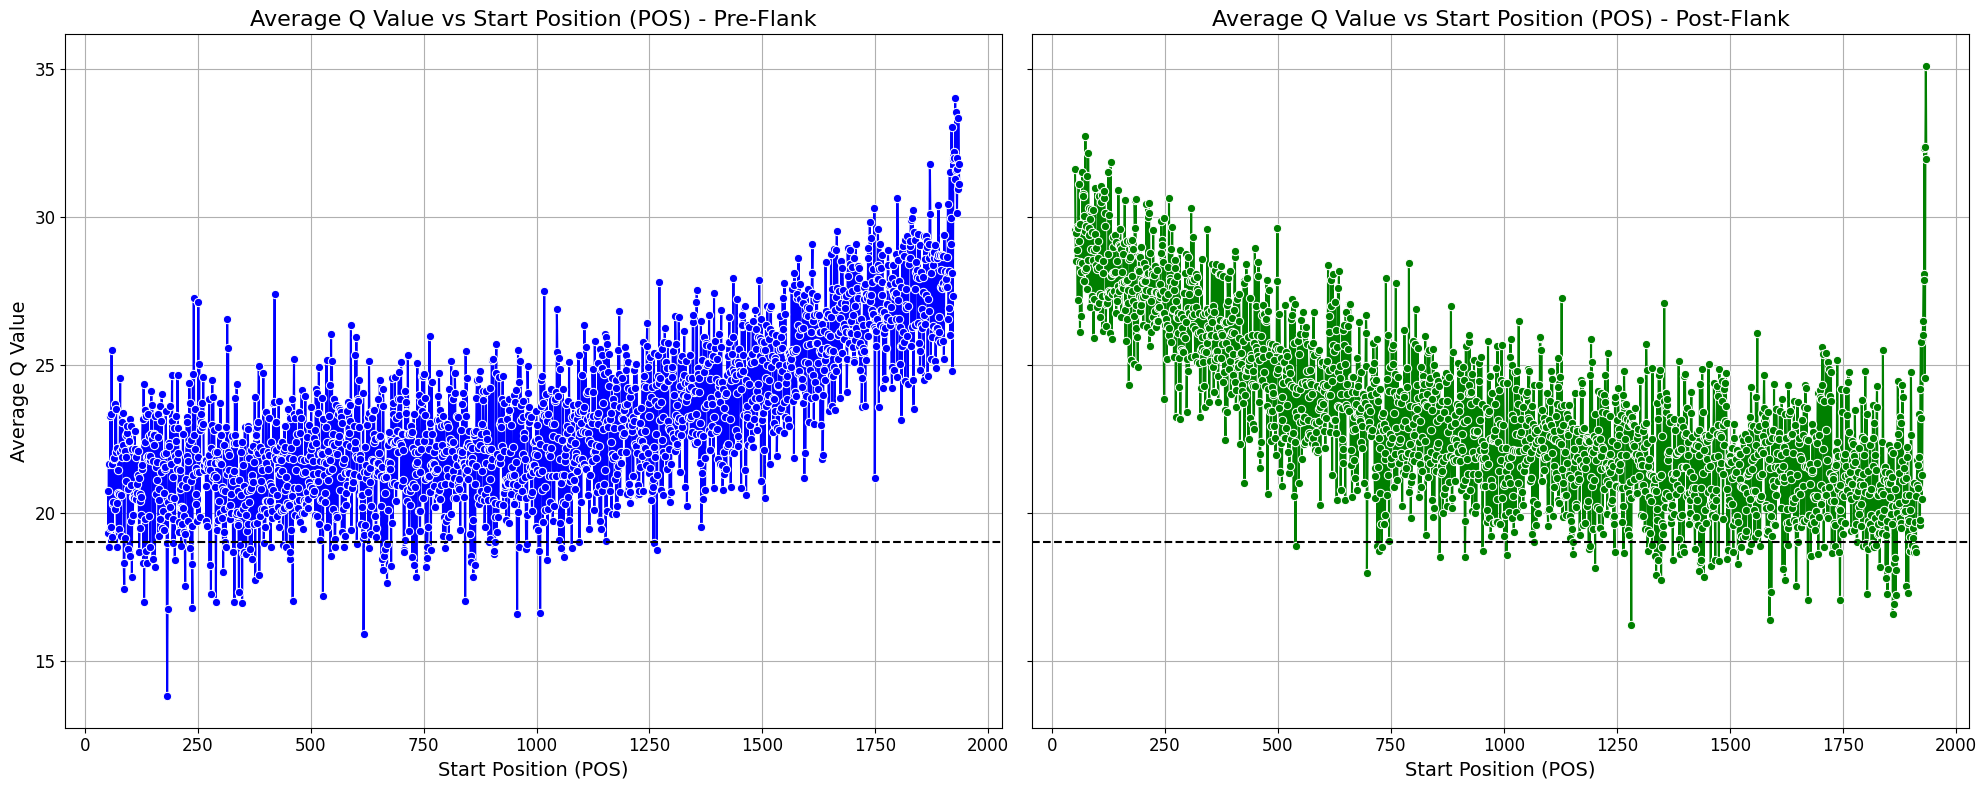

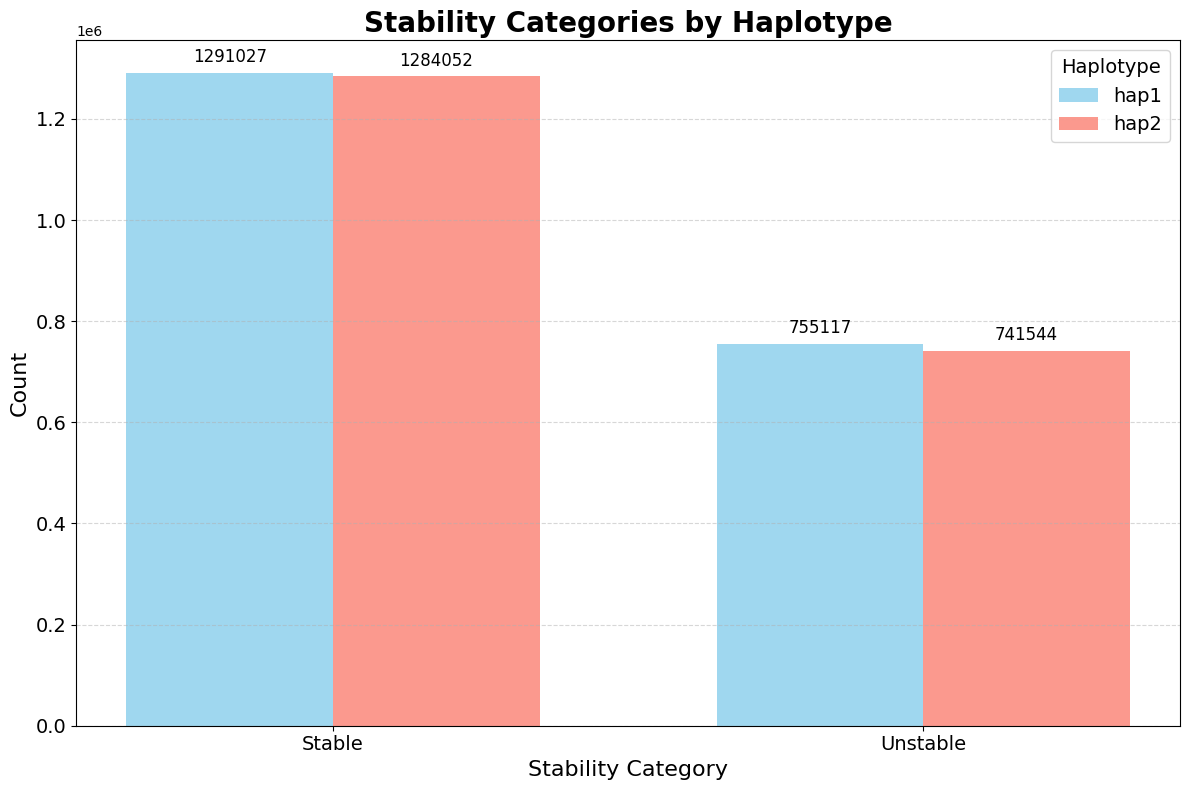

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# -------------------
# Step 1: Load and Process the Data
# -------------------

# Define the file path (replace with your actual file path)
file_path = '/scratch-old/alextu/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: The file '{file_path}' is malformed or not in CSV format.")
    exit(1)

# Display the first few rows to verify
print("\nInitial Data:")
print(df.head())

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# Ensure 'L' column is numeric (if not already)
df['L'] = pd.to_numeric(df['L'], errors='coerce')

# Drop rows where 'L' is NA after conversion
df = df.dropna(subset=['L'])

# Function to extract flanking region from Sample column
def extract_flank(sample_name):
    """
    Extracts the flanking region ('pre_flank' or 'post_flank') from the sample_name.
    """
    match = re.search(r'_(pre|post)_flank\.txt$', sample_name)
    if match:
        return f"{match.group(1)}_flank"
    else:
        return "Unknown"

# Apply the extraction
df['Flank'] = df['Sample'].apply(extract_flank)

# Remove rows with 'Unknown' flanks if any
df = df[df['Flank'] != 'Unknown']

# Verify flanks extraction
print("\nData after extracting flanks:")
print(df[['Sample', 'Flank']].head())

# -------------------
# Step 2: Calculate Average Q by POS and Flank
# -------------------

# Calculate average Q values by POS and Flank
average_q = df.groupby(['POS', 'Flank'])['Q'].mean().reset_index()

# Pivot the data for easier plotting (optional)
average_q_pivot = average_q.pivot(index='POS', columns='Flank', values='Q')

# Sort the data by POS for plotting
average_q_pivot = average_q_pivot.sort_index()

# -------------------
# Step 3: Plot Average Q vs POS for Pre-Flank and Post-Flank Side by Side
# -------------------

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# -------------------
# Subplot 1: Pre-Flanking Region
# -------------------
# Filter data for pre_flank
pre_flank_data = average_q[average_q['Flank'] == 'pre_flank']

sns.lineplot(ax=axs[0], data=pre_flank_data, x='POS', y='Q', marker='o', color='blue')
axs[0].set_title('Average Q Value vs Start Position (POS) - Pre-Flank', fontsize=16)
axs[0].set_xlabel('Start Position (POS)', fontsize=14)
axs[0].set_ylabel('Average Q Value', fontsize=14)
axs[0].grid(True)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

# **Add Horizontal Line at Q = 19**
axs[0].axhline(y=19, color='black', linestyle='--', linewidth=1.5, label='Q = 19 Threshold')

# Optionally, add a legend for the horizontal line
# axs[0].legend()

# -------------------
# Subplot 2: Post-Flanking Region
# -------------------
# Filter data for post_flank
post_flank_data = average_q[average_q['Flank'] == 'post_flank']

sns.lineplot(ax=axs[1], data=post_flank_data, x='POS', y='Q', marker='o', color='green')
axs[1].set_title('Average Q Value vs Start Position (POS) - Post-Flank', fontsize=16)
axs[1].set_xlabel('Start Position (POS)', fontsize=14)
axs[1].grid(True)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

# **Add Horizontal Line at Q = 19**
axs[1].axhline(y=19, color='black', linestyle='--', linewidth=1.5, label='Q = 19 Threshold')

# Optionally, add a legend for the horizontal line
# axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined plot as a high-resolution PDF
plt.savefig('average_Q_vs_POS_pre_and_post_flank_with_threshold.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Display the plots
plt.show()

# -------------------
# Step 4: Plot Stability Categories Barplot
# -------------------

# **Updated Stability Categorization Function**
# Redefine stability categories based on Q values: Q > 19 is "Stable", Q < 19 is "Unstable"

def categorize_stability(value):
    if value > 19:
        return "Stable"
    else:
        return "Unstable"

# Apply the updated categorization
df["Stability"] = df["Q"].apply(categorize_stability)

# Define the new order of categories for consistency
stability_categories = ["Stable", "Unstable"]

# Get value counts and reindex to maintain category order
# Assuming 'hap1' and 'hap2' are identified in the 'Sample' column
hap1_counts = df[df['Sample'].str.contains('hap1')]["Stability"].value_counts().reindex(stability_categories).fillna(0)
hap2_counts = df[df['Sample'].str.contains('hap2')]["Stability"].value_counts().reindex(stability_categories).fillna(0)

# Create a DataFrame for plotting
stability_df = pd.DataFrame({"hap1": hap1_counts, "hap2": hap2_counts}).fillna(0)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.35
indices = range(len(stability_categories))

# Create bars for hap1 and hap2
bars1 = ax.bar([i - bar_width/2 for i in indices], stability_df['hap1'], 
              width=bar_width, label='hap1', color='skyblue', alpha=0.8)
bars2 = ax.bar([i + bar_width/2 for i in indices], stability_df['hap2'], 
              width=bar_width, label='hap2', color='salmon', alpha=0.8)

# Add title and labels with larger font sizes
ax.set_title("Stability Categories by Haplotype", fontsize=20, fontweight='bold')
ax.set_xlabel("Stability Category", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

# Set x-axis ticks and labels with larger font sizes
ax.set_xticks(indices)
ax.set_xticklabels(stability_categories, fontsize=14)

# Set y-axis ticks font size
ax.tick_params(axis='y', labelsize=14)

# Add legend with larger font size and outside the plot
ax.legend(title="Haplotype", fontsize=14, title_fontsize=14, loc='upper right')

# Add count labels on top of each bar with larger font size
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Increased vertical offset from 3 to 5
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

add_labels(bars1)
add_labels(bars2)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.5, axis='y')

# Adjust layout to accommodate legend and labels
plt.tight_layout()

# Save the barplot as a high-resolution PDF
plt.savefig('stability_categories_barplot.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# MEI Flanks

In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_flanks_with_TE_designations.csv')

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# 1. Total number of G quadruplexes (rows in the DataFrame after removing NA)
total_g4s = len(df)

# 2. Count stable and non-stable G quadruplexes based on the Q column
stable_count = df[df['Q'] > 19].shape[0]
non_stable_count = df[df['Q'] <= 19].shape[0]

# Print the results
print("Total number of G quadruplexes found in the flanks:", total_g4s)
print("Number of stable G quadruplexes (Q > 19):", stable_count)
print("Number of non-stable G quadruplexes (Q <= 19):", non_stable_count)

Total number of G quadruplexes found in the flanks: 76510
Number of stable G quadruplexes (Q > 19): 37683
Number of non-stable G quadruplexes (Q <= 19): 38827


Dataset loaded successfully.

Initial Data:
                                              Sample   POS STR   L      Q  \
0  flanking_sequences_HG00514_hap2_chr10_10958044...  1490   -  28  11.33   
1  flanking_sequences_HG00514_hap2_chr10_11320309...   431   +  24  28.47   
2  flanking_sequences_HG00514_hap2_chr10_11320309...   589   -  35  32.66   
3  flanking_sequences_HG00514_hap2_chr10_12367735...   544   -  41   4.83   
4  flanking_sequences_HG00514_hap2_chr10_12367935...  1531   -  33   5.86   

                                    SEQUENCE te_designation  \
0               CCCCCCCATTAAAACAAACCCAATTCCC        LINE/L1   
1                   GGGAGGCCAAGGGTGGGGGTGGGG       SINE/Alu   
2        CCCCCCTCACCCTCCTTCCCTGAGCCTCCCTCCCC       SINE/Alu   
3  CCCTGGGTCAGCCCCAAGTCCCTCAGCCCCACATCCTGCCC       SINE/Alu   
4          CCCCACGACCCACCTGCCCCATTATTAATCCCC       SINE/Alu   

                                       l1me_aid_info  
0  SV_Length:842;TE_Designation:LINE/L1;RM_Annota...  
1  S

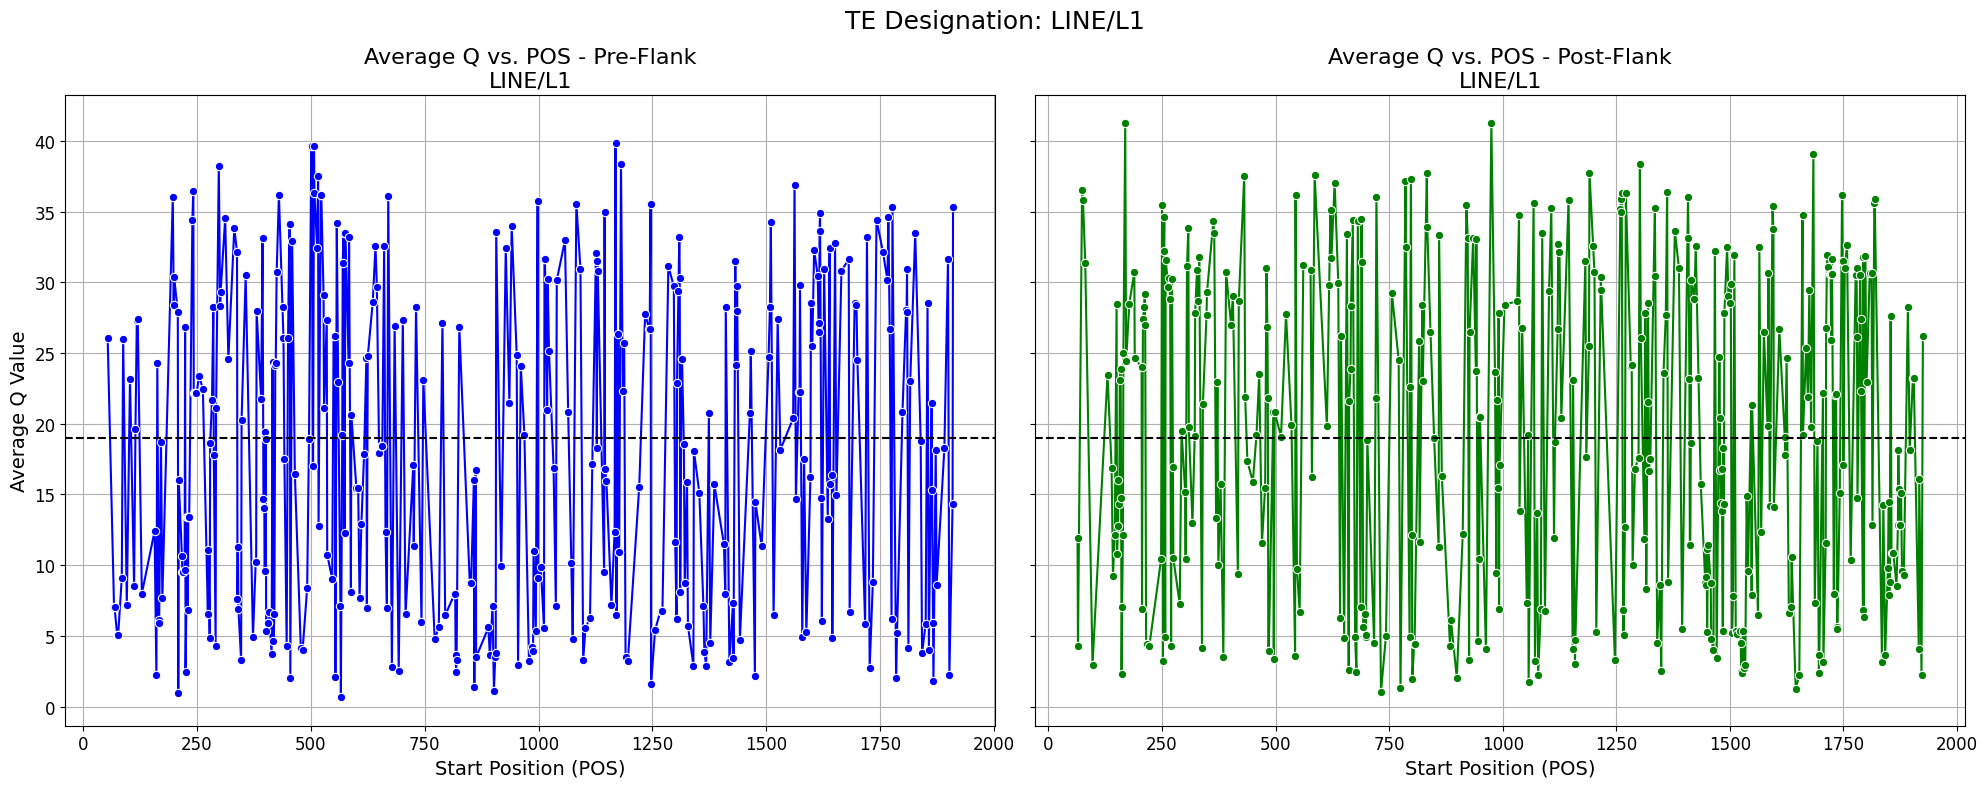

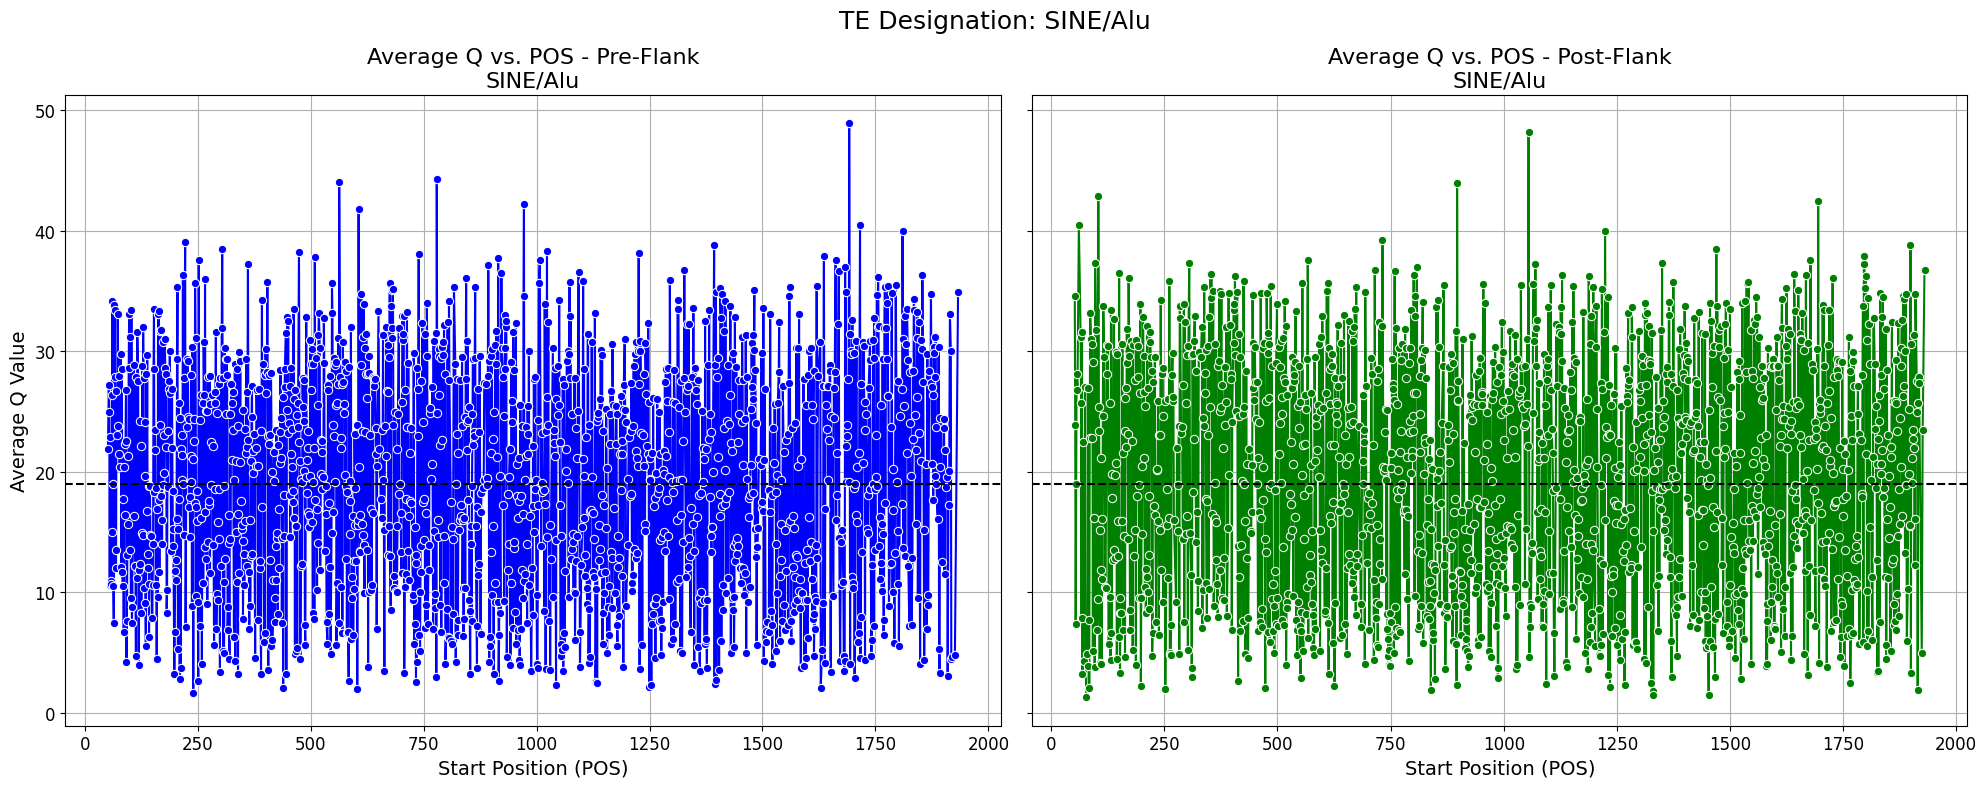

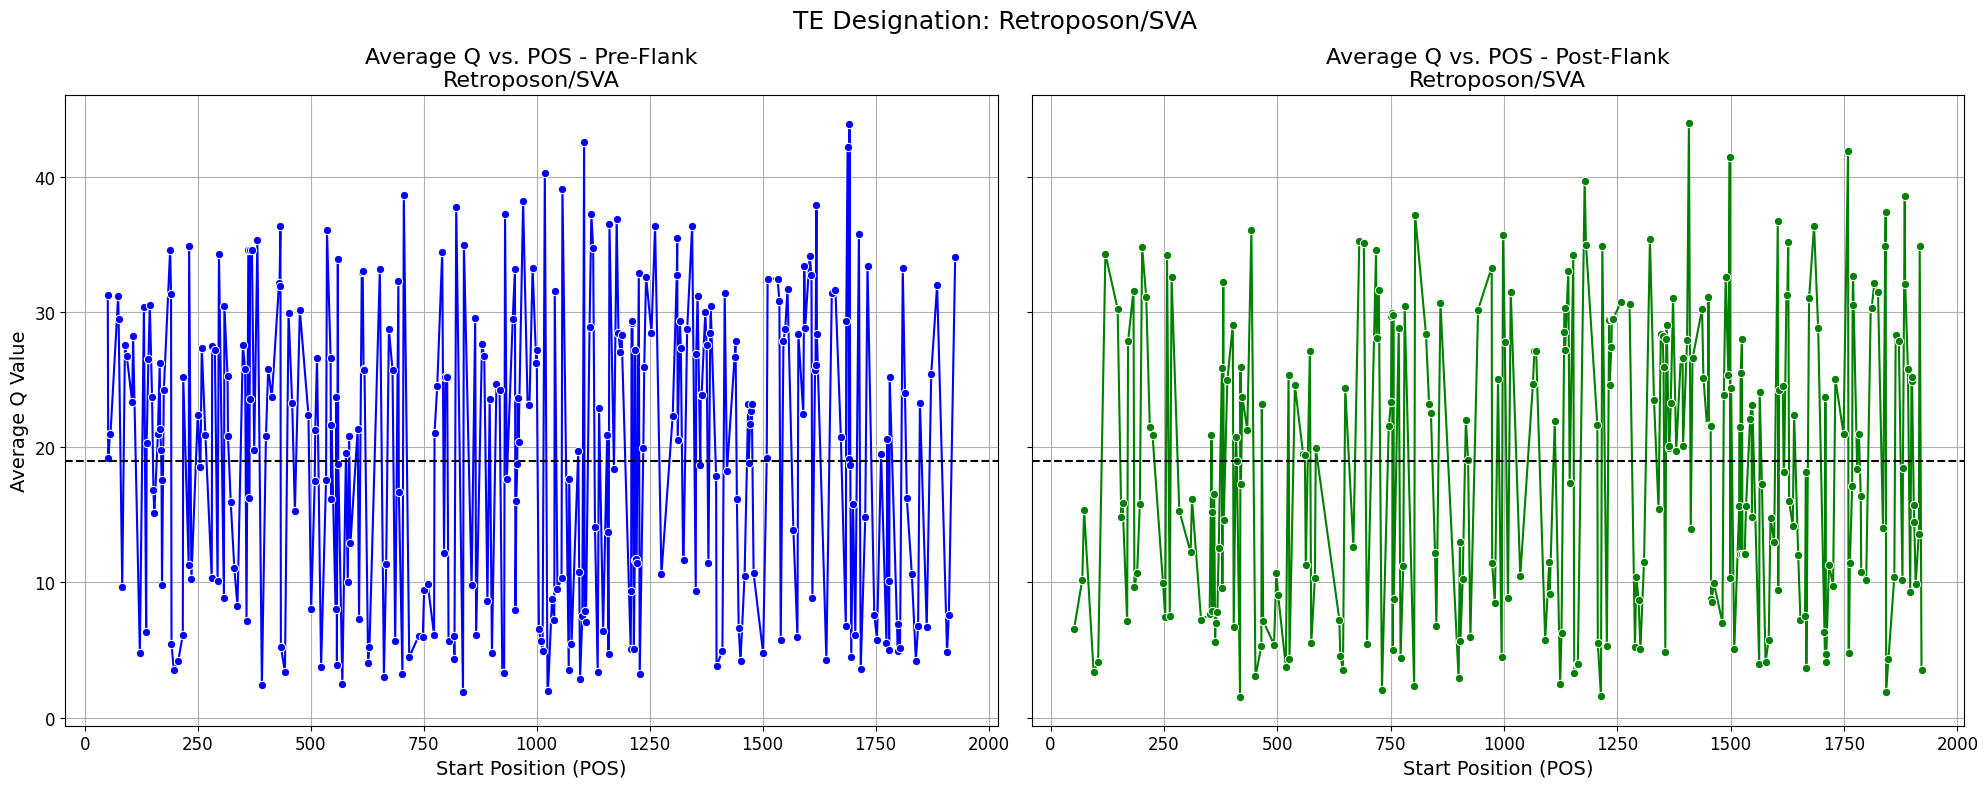

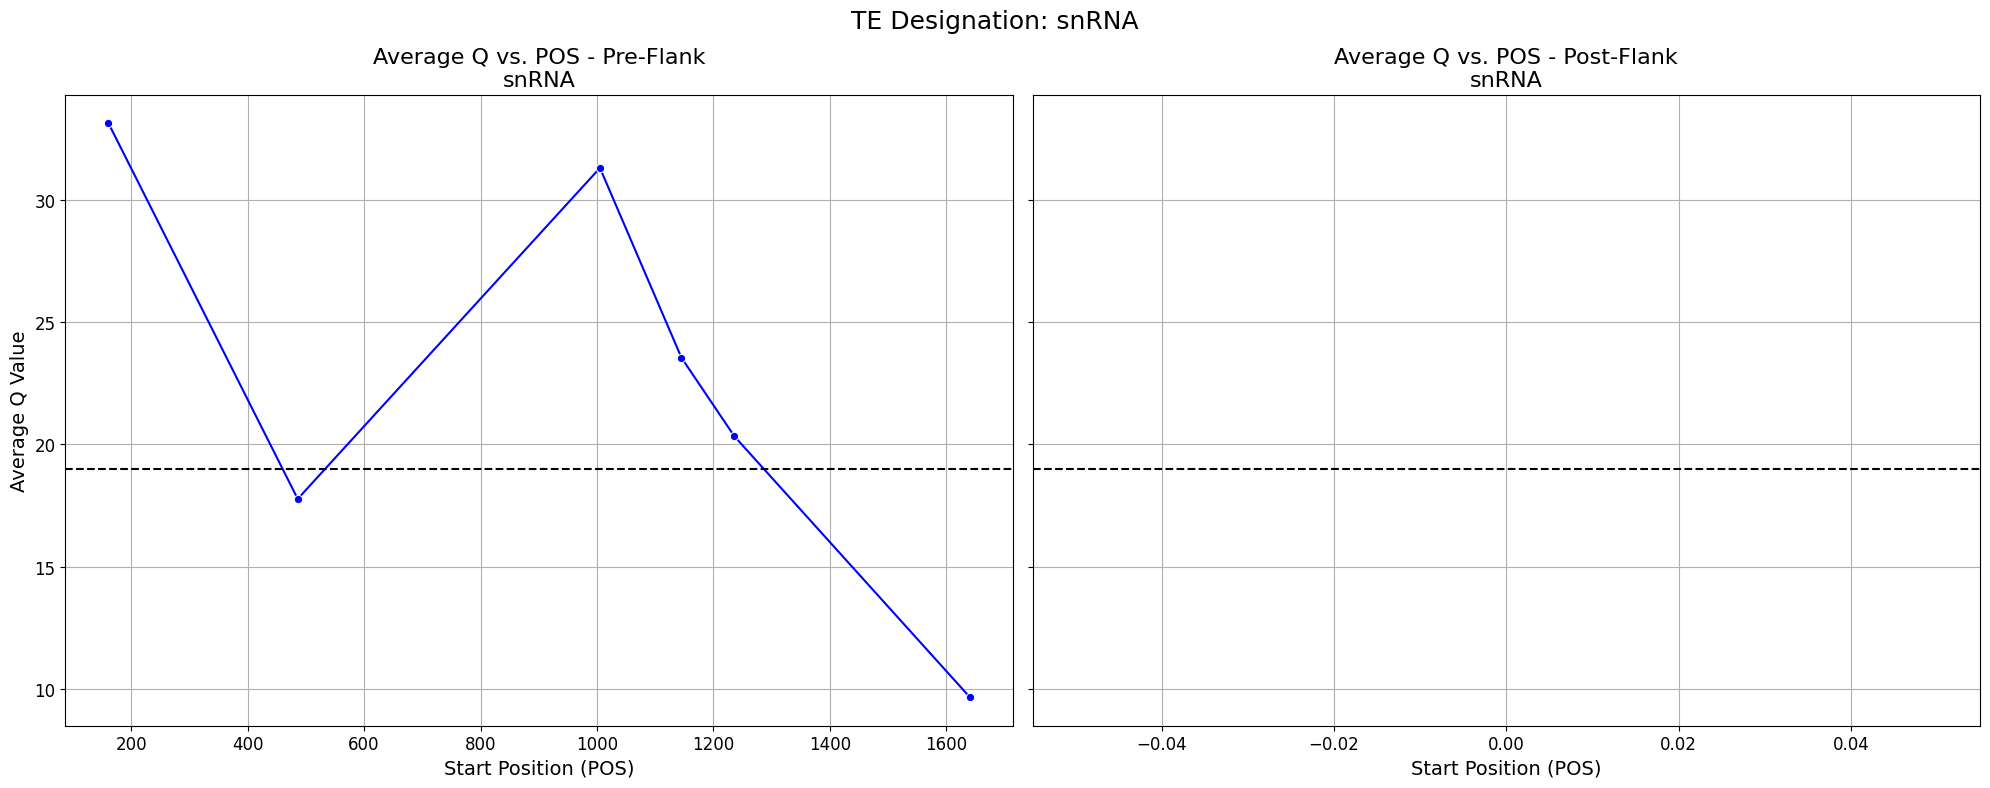

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# -------------------
# Step 1: Load and Process the Data
# -------------------

# Define the file path (replace with your actual file path)
file_path = '/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_flanks_with_TE_designations.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: The file '{file_path}' is malformed or not in CSV format.")
    exit(1)

# Display the first few rows to verify
print("\nInitial Data:")
print(df.head())

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# Ensure 'L' column is numeric (if not already)
df['L'] = pd.to_numeric(df['L'], errors='coerce')

# Drop rows where 'L' is NA after conversion
df = df.dropna(subset=['L'])

# Function to extract flanking region from Sample column
def extract_flank(sample_name):
    """
    Extracts the flanking region ('pre_flank' or 'post_flank') from the sample_name.
    """
    match = re.search(r'_(pre|post)_flank\.txt$', sample_name)
    if match:
        return f"{match.group(1)}_flank"
    else:
        return "Unknown"

# Apply the extraction
df['Flank'] = df['Sample'].apply(extract_flank)

# Remove rows with 'Unknown' flanks if any
df = df[df['Flank'] != 'Unknown']

# Verify flanks extraction
print("\nData after extracting flanks:")
print(df[['Sample', 'Flank']].head())

# -------------------
# Step 2: Separate by TE Designation, then Calculate and Plot Average Q by POS and Flank
# -------------------

# Get all unique TE designations
unique_tes = df['te_designation'].unique()

for te_designation in unique_tes:
    df_te = df[df['te_designation'] == te_designation].copy()
    
    # If there's no data for this TE (or it's trivially small), skip
    if len(df_te) < 1:
        continue
    
    # Calculate average Q by POS and Flank
    avg_q = df_te.groupby(['POS', 'Flank'])['Q'].mean().reset_index()

    # Separate pre_flank and post_flank for line plots
    pre_flank_data  = avg_q[avg_q['Flank'] == 'pre_flank']
    post_flank_data = avg_q[avg_q['Flank'] == 'post_flank']

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

    # Subplot 1: Pre-Flank
    sns.lineplot(ax=axs[0], data=pre_flank_data, x='POS', y='Q', marker='o', color='blue')
    axs[0].set_title(f'Average Q vs. POS - Pre-Flank\n{te_designation}', fontsize=16)
    axs[0].set_xlabel('Start Position (POS)', fontsize=14)
    axs[0].set_ylabel('Average Q Value', fontsize=14)
    axs[0].grid(True)
    axs[0].tick_params(axis='x', labelsize=12)
    axs[0].tick_params(axis='y', labelsize=12)
    # Horizontal line at Q=19
    axs[0].axhline(y=19, color='black', linestyle='--', linewidth=1.5)

    # Subplot 2: Post-Flank
    sns.lineplot(ax=axs[1], data=post_flank_data, x='POS', y='Q', marker='o', color='green')
    axs[1].set_title(f'Average Q vs. POS - Post-Flank\n{te_designation}', fontsize=16)
    axs[1].set_xlabel('Start Position (POS)', fontsize=14)
    axs[1].grid(True)
    axs[1].tick_params(axis='x', labelsize=12)
    axs[1].tick_params(axis='y', labelsize=12)
    # Horizontal line at Q=19
    axs[1].axhline(y=19, color='black', linestyle='--', linewidth=1.5)

    plt.suptitle(f"TE Designation: {te_designation}", fontsize=18)
    plt.tight_layout()

    # Save each figure with a filename based on the TE
    #outname = f"average_Q_vs_POS_{te_designation}.pdf"
    #plt.savefig(outname, format='pdf', dpi=300, bbox_inches='tight')
    #print(f"Saved figure: {outname}")

    plt.show()

Loading MEI data from '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/MEIflanks_collapsed_summary_metrics_chr_position_with_TE_designations.csv'...
Successfully loaded MEI data. Shape: (1648323, 6)
MEI data Data Sample:
                         Sample_Haplotype_Chromosome Motif Type  Start   End  \
0  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    146   160   
1  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    347   360   
2  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    620   657   
3  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    785   800   
4  flanking_sequences_HG00514_hap2|chr10:10811646...         IR   1094  1105   

  te_designation                                      l1me_aid_info  
0       SINE/Alu  SV_Length:324;TE_Designation:SINE/Alu;RM_Annot...  
1       SINE/Alu  SV_Length:324;TE_Designation:SINE/Alu;RM_Annot...  
2       SINE/Alu  SV_Length:324;TE_Designation:SINE/Alu;RM_Ann

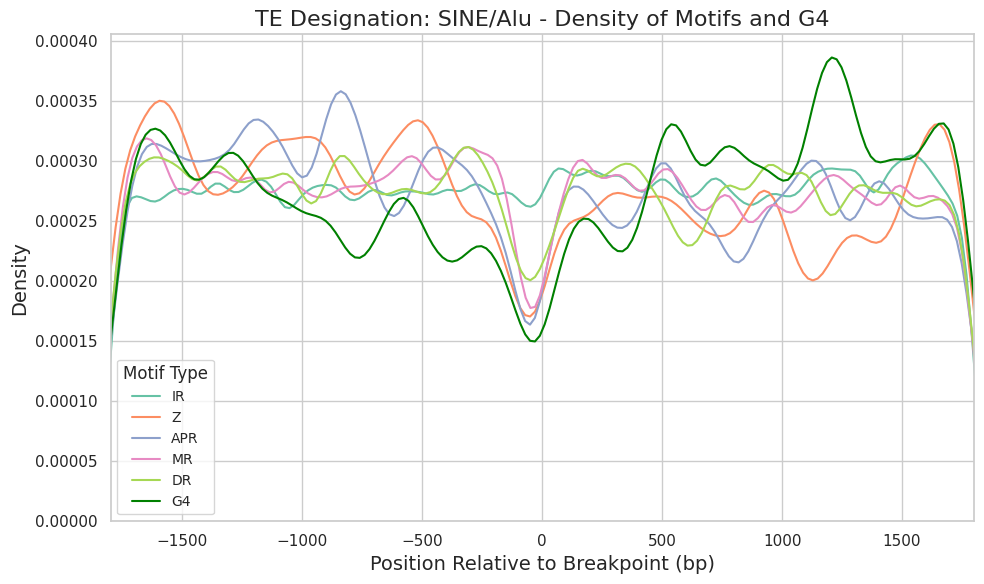


Generating plot for TE Designation: LINE/L1
MEI Data filtered: 174961 rows
G4 Data filtered: 7138 rows
Unique Motif Types: ['IR' 'Z' 'APR' 'MR' 'DR']


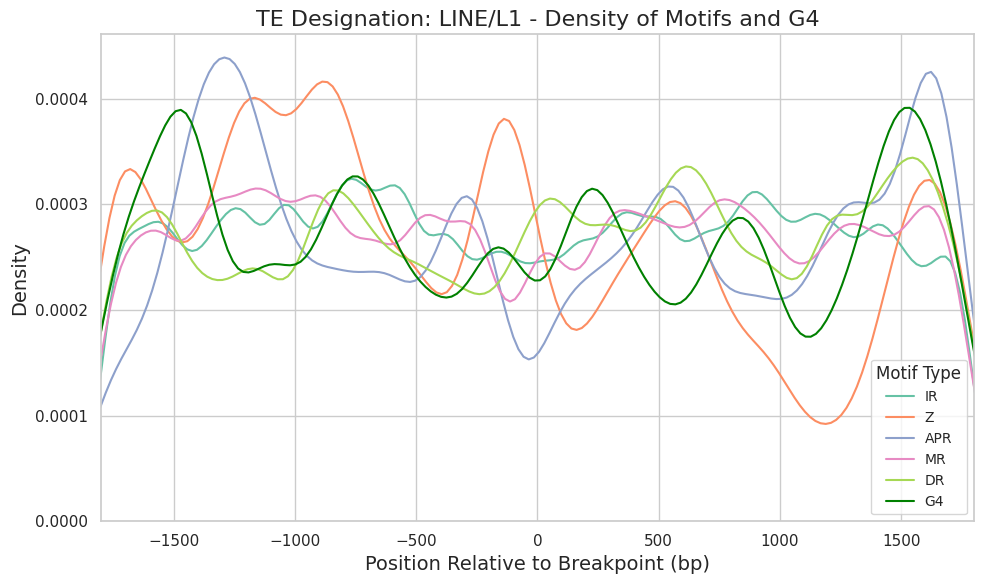


Generating plot for TE Designation: Retroposon/SVA
MEI Data filtered: 75381 rows
G4 Data filtered: 5085 rows
Unique Motif Types: ['IR' 'Z' 'APR' 'MR' 'DR']


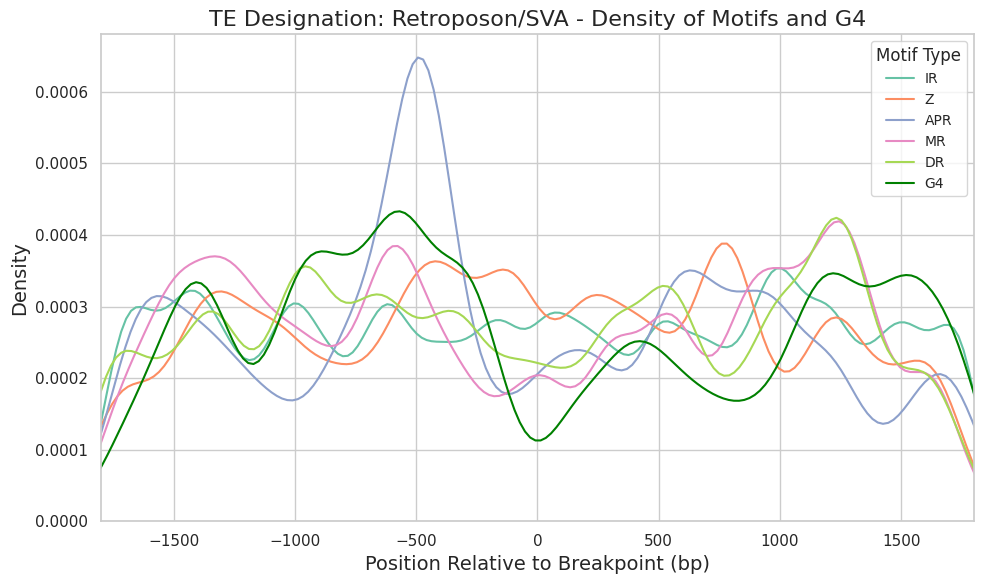


Generating plot for TE Designation: snRNA
MEI Data filtered: 14 rows
G4 Data filtered: 5 rows
Unique Motif Types: ['IR' 'Z' 'APR' 'MR' 'DR']


/tmp/ipykernel_647975/275995480.py:182: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_647975/275995480.py:182: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_647975/275995480.py:182: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


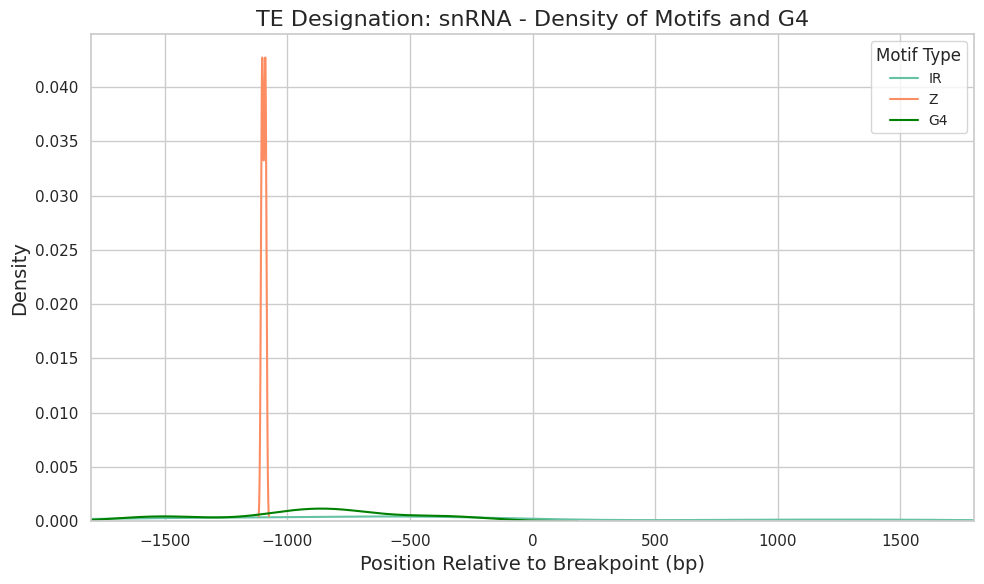


Density plots successfully created and saved.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

# ==========================
# Configuration
# ==========================
DEBUG = True  # Set to False to disable debug print statements

# File paths
MEI_FILE_PATH = '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/MEIflanks_collapsed_summary_metrics_chr_position_with_TE_designations.csv'
G4_FILE_PATH = '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/all_combined_quadron_results_MEI_flanks_with_TE_designations.csv'

# Plot configurations
PLOT_SIZE = (10, 6)
X_LIMITS = (-1800, 1800)  # Adjusted to ensure symmetry
PLOT_SAVE_DIR = '/home/alextu/projects/def-sushant/'  # Update as needed

# ==========================
# Utility Functions
# ==========================
def debug_print(*args):
    """Utility function for conditional debugging."""
    if DEBUG:
        print(*args)

# ==========================
# Load CSV Data
# ==========================
def load_csv(file_path, description):
    """Load a CSV file and handle errors."""
    debug_print(f"Loading {description} from '{file_path}'...")
    try:
        df = pd.read_csv(file_path)
        debug_print(f"Successfully loaded {description}. Shape: {df.shape}")
        debug_print(f"{description} Data Sample:")
        debug_print(df.head())
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        sys.exit(1)
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty.")
        sys.exit(1)
    except pd.errors.ParserError:
        print(f"Error: The file '{file_path}' does not appear to be in CSV format or is malformed.")
        sys.exit(1)

df_mei = load_csv(MEI_FILE_PATH, "MEI data")
df_g4 = load_csv(G4_FILE_PATH, "G4 data")

# ==========================
# Adjust rel_pos for Centering
# ==========================
def adjust_rel_pos(row, col_name, desired_pre_min, desired_pre_max, desired_post_min, desired_post_max):
    """
    Adjust the relative positions to be within the range -1800 to 0 for pre-flank
    and 0 to 1800 for post-flank using linear scaling.
    """
    if row['flank'] == 'pre':
        # Scale pre-flank range
        return row[col_name] - 2000
    elif row['flank'] == 'post':
        # Scale post-flank range
        return row[col_name] - 1
    return None

# ==========================
# Process MEI Data
# ==========================
def process_mei_data(df):
    """
    Process the MEI DataFrame to extract TE designations, motif types, flanks, and calculate relative positions.
    """
    debug_print("\nProcessing MEI data...")

    # Extract flank type (pre/post)
    df['flank'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(pre|post)_flank')

    # Drop rows without flank information
    df.dropna(subset=['flank'], inplace=True)

    # Adjust relative positions
    df['rel_pos'] = df.apply(
        adjust_rel_pos,
        axis=1,
        col_name='Start',
        desired_pre_min=-1800,
        desired_pre_max=0,
        desired_post_min=0,
        desired_post_max=1800
    )

    # Validate ranges
    debug_print(f"Adjusted MEI Pre-flank rel_pos range: {df[df['flank'] == 'pre']['rel_pos'].min()} to {df[df['flank'] == 'pre']['rel_pos'].max()}")
    debug_print(f"Adjusted MEI Post-flank rel_pos range: {df[df['flank'] == 'post']['rel_pos'].min()} to {df[df['flank'] == 'post']['rel_pos'].max()}")

    df = df[(df['rel_pos'] >= X_LIMITS[0]) & (df['rel_pos'] <= X_LIMITS[1])]  # Filter by limits

    debug_print(f"Processed MEI Data Shape: {df.shape}")
    debug_print("Processed MEI Data Sample:")
    debug_print(df.head())

    return df

df_mei = process_mei_data(df_mei)

# ==========================
# Process G4 Data
# ==========================
def process_g4_data(df):
    """
    Process the G4 DataFrame to extract flank type and calculate relative positions.
    """
    debug_print("\nProcessing G4 data...")

    # Extract flank type (pre/post)
    df['flank'] = df['Sample'].str.extract(r'(pre|post)_flank')

    # Drop rows without flank information
    df.dropna(subset=['flank'], inplace=True)

    # Adjust relative positions
    df['rel_pos'] = df.apply(
        adjust_rel_pos,
        axis=1,
        col_name='POS',
        desired_pre_min=-1800,
        desired_pre_max=0,
        desired_post_min=0,
        desired_post_max=1800
    )

    # Validate ranges
    debug_print(f"Adjusted G4 Pre-flank rel_pos range: {df[df['flank'] == 'pre']['rel_pos'].min()} to {df[df['flank'] == 'pre']['rel_pos'].max()}")
    debug_print(f"Adjusted G4 Post-flank rel_pos range: {df[df['flank'] == 'post']['rel_pos'].min()} to {df[df['flank'] == 'post']['rel_pos'].max()}")

    df = df[(df['rel_pos'] >= X_LIMITS[0]) & (df['rel_pos'] <= X_LIMITS[1])]  # Filter by limits

    debug_print(f"Processed G4 Data Shape: {df.shape}")
    debug_print("Processed G4 Data Sample:")
    debug_print(df.head())

    return df

df_g4 = process_g4_data(df_g4)

# ==========================
# Generate Density Plots
# ==========================
def plot_density_per_te(df_mei, df_g4, te_designation, save_dir=PLOT_SAVE_DIR):
    """
    Plot density for a single TE designation, including G4 data.
    """
    debug_print(f"\nGenerating plot for TE Designation: {te_designation}")

    # Filter data
    df_te = df_mei[df_mei['te_designation'] == te_designation]
    df_te_g4 = df_g4[df_g4['te_designation'] == te_designation]

    debug_print(f"MEI Data filtered: {df_te.shape[0]} rows")
    debug_print(f"G4 Data filtered: {df_te_g4.shape[0]} rows")

    unique_motifs = df_te['Motif Type'].unique()
    debug_print(f"Unique Motif Types: {unique_motifs}")

    # Assign colors to motifs
    palette = sns.color_palette(n_colors=len(unique_motifs) + 1)
    motif_colors = dict(zip(unique_motifs, palette))
    motif_colors['G4'] = palette[-1]

    plt.figure(figsize=PLOT_SIZE)

    # Plot motif densities
    if not df_te.empty:
        for motif in unique_motifs:
            motif_df = df_te[df_te['Motif Type'] == motif]
            if motif_df.empty:
                continue
            sns.kdeplot(
                data=motif_df,
                x='rel_pos',
                label=motif,
                linewidth=1.5,
                color=motif_colors[motif],
                bw_adjust=0.6  # Smoothing
            )

    # Plot G4 densities
    if not df_te_g4.empty:
        sns.kdeplot(
            data=df_te_g4,
            x='rel_pos',
            label='G4',
            linewidth=1.5,
            linestyle='-',
            color='green',
            bw_adjust=0.6
        )

    # Add plot details
    #plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Reference line at 0
    plt.title(f"TE Designation: {te_designation} - Density of Motifs and G4", fontsize=16)
    plt.xlabel('Position Relative to Breakpoint (bp)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xlim(X_LIMITS)
    plt.legend(title='Motif Type', fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()

# Define the TE designations to plot
te_designations = df_mei['te_designation'].unique()

# Generate and save plots for each TE designation
for te in te_designations:
    plot_density_per_te(df_mei, df_g4, te)

debug_print("\nDensity plots successfully created and saved.")

Loading MEI data from '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/MEIflanks_collapsed_summary_metrics_chr_position_with_TE_designations.csv'...
Successfully loaded MEI data. Shape: (1648323, 6)
MEI data Data Sample:
                         Sample_Haplotype_Chromosome Motif Type  Start   End  \
0  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    146   160   
1  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    347   360   
2  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    620   657   
3  flanking_sequences_HG00514_hap2|chr10:10811646...         IR    785   800   
4  flanking_sequences_HG00514_hap2|chr10:10811646...         IR   1094  1105   

  te_designation                                      l1me_aid_info  
0       SINE/Alu  SV_Length:324;TE_Designation:SINE/Alu;RM_Annot...  
1       SINE/Alu  SV_Length:324;TE_Designation:SINE/Alu;RM_Annot...  
2       SINE/Alu  SV_Length:324;TE_Designation:SINE/Alu;RM_Ann

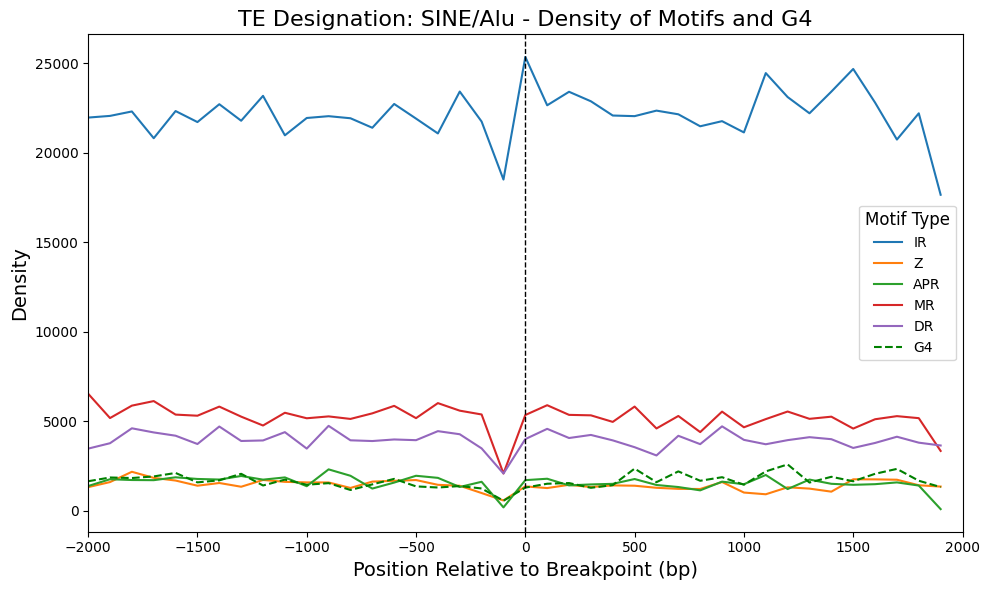


Generating plot for TE Designation: LINE/L1
MEI Data filtered: 195231 rows
G4 Data filtered: 7718 rows
Unique Motif Types: ['IR' 'Z' 'APR' 'MR' 'DR']


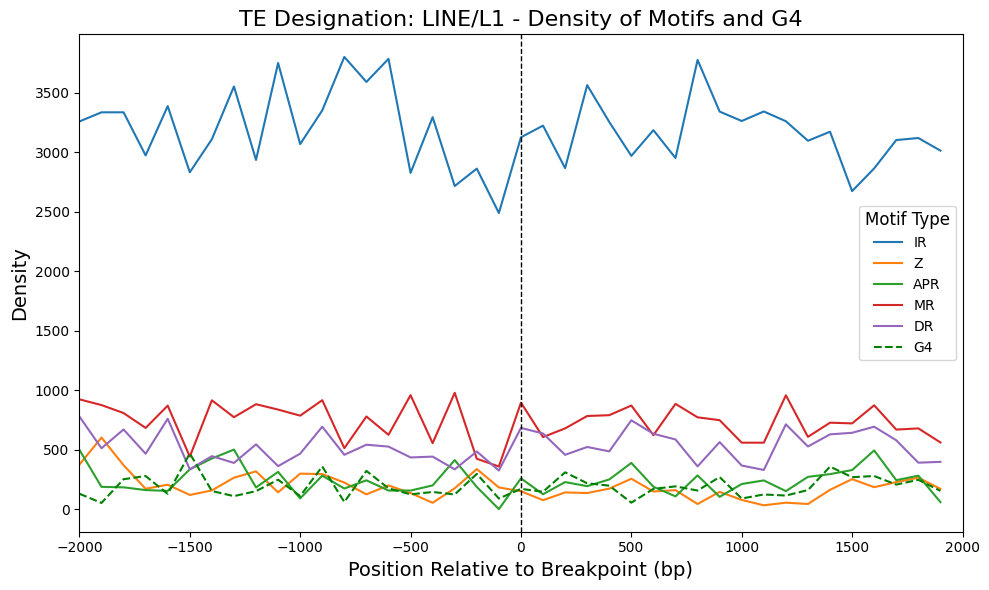


Generating plot for TE Designation: Retroposon/SVA
MEI Data filtered: 82462 rows
G4 Data filtered: 5844 rows
Unique Motif Types: ['IR' 'Z' 'APR' 'MR' 'DR']


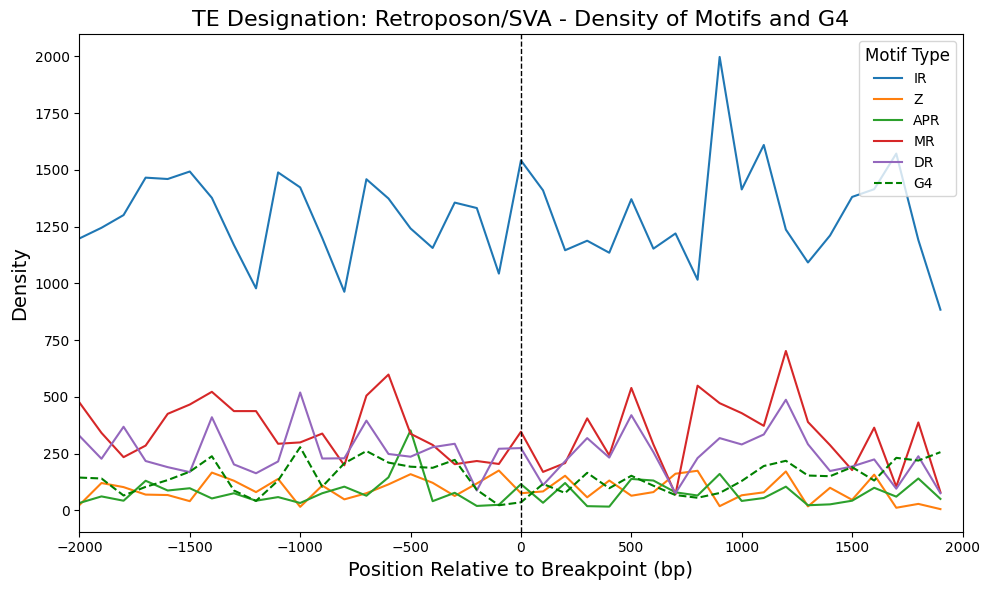


Generating plot for TE Designation: snRNA
MEI Data filtered: 15 rows
G4 Data filtered: 6 rows
Unique Motif Types: ['IR' 'Z' 'APR' 'MR' 'DR']


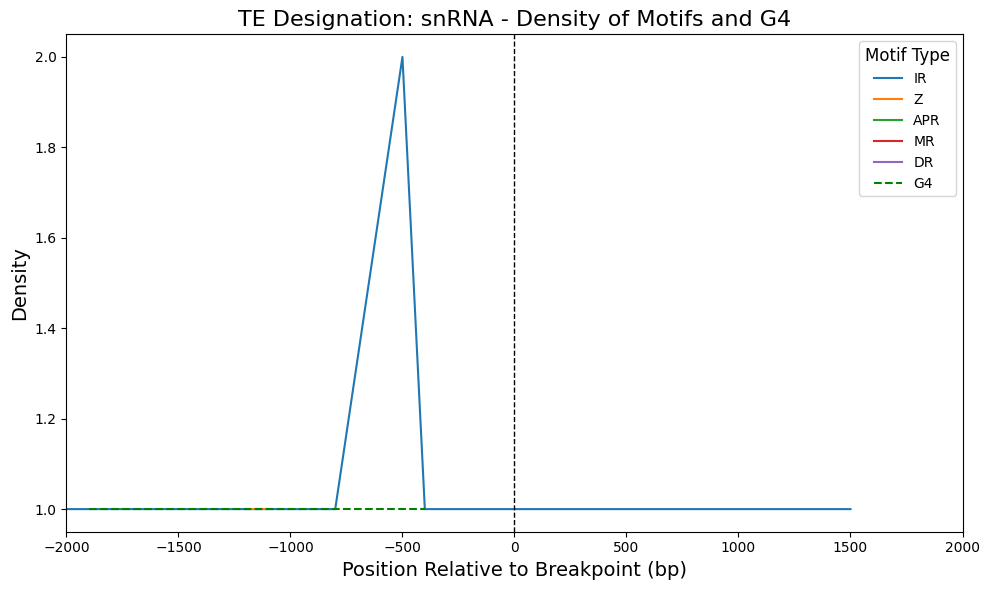


Density plots successfully created and saved.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import sys

# ==========================
# Configuration
# ==========================
DEBUG = True  # Set to False to disable debug print statements

# File paths
MEI_FILE_PATH = '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/MEIflanks_collapsed_summary_metrics_chr_position_with_TE_designations.csv'
G4_FILE_PATH = '/home/alextu/projects/def-sushant/alextu/extract_SV_and_MEI_flank_scripts/all_combined_quadron_results_MEI_flanks_with_TE_designations.csv'

# Plot configurations
PLOT_SIZE = (10, 6)
X_LIMITS = (-2000, 2000)
BIN_SIZE = 100  # Size of each bin in bp
PLOT_SAVE_DIR = '/home/alextu/projects/def-sushant/'  # Update as needed

# ==========================
# Utility Functions
# ==========================
def debug_print(*args):
    """Utility function for conditional debugging."""
    if DEBUG:
        print(*args)

# ==========================
# 1. Load the CSV Data
# ==========================
def load_csv(file_path, description):
    """Load a CSV file and handle errors."""
    debug_print(f"Loading {description} from '{file_path}'...")
    try:
        df = pd.read_csv(file_path)
        debug_print(f"Successfully loaded {description}. Shape: {df.shape}")
        debug_print(f"{description} Data Sample:")
        debug_print(df.head())
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        sys.exit(1)
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty.")
        sys.exit(1)
    except pd.errors.ParserError:
        print(f"Error: The file '{file_path}' does not appear to be in CSV format or is malformed.")
        sys.exit(1)

df_mei = load_csv(MEI_FILE_PATH, "MEI data")
df_g4 = load_csv(G4_FILE_PATH, "G4 data")

# ==========================
# 2. Process MEI Data
# ==========================
def process_mei_data(df):
    """
    Process the MEI DataFrame to extract TE designations, motif types, flanks, and calculate relative positions.
    """
    debug_print("\nProcessing MEI data...")

    # Extract flank type (pre/post)
    df['flank'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(pre|post)_flank')

    # Drop rows without flank information
    df.dropna(subset=['flank'], inplace=True)

    # Calculate relative position
    def calculate_rel_pos(row, col_name='Start'):
        if row['flank'] == 'pre':
            return row[col_name] - 2001  # Align pre-flanks: 1..1989 -> -1989..-1
        elif row['flank'] == 'post':
            return row[col_name]  # Post-flanks remain as is
        return None

    df['rel_pos'] = df.apply(calculate_rel_pos, axis=1)

    # Bin the data
    df['binned_pos'] = pd.cut(df['rel_pos'], bins=np.arange(X_LIMITS[0], X_LIMITS[1] + BIN_SIZE, BIN_SIZE), labels=False)
    df = df[(df['rel_pos'] >= X_LIMITS[0]) & (df['rel_pos'] <= X_LIMITS[1])]  # Filter by limits

    debug_print(f"Processed MEI Data Shape: {df.shape}")
    debug_print("Processed MEI Data Sample:")
    debug_print(df.head())

    return df

df_mei = process_mei_data(df_mei)

# ==========================
# 3. Process G4 Data
# ==========================
def process_g4_data(df):
    """
    Process the G4 DataFrame to extract flank type and calculate relative positions.
    """
    debug_print("\nProcessing G4 data...")

    # Extract flank type (pre/post)
    df['flank'] = df['Sample'].str.extract(r'(pre|post)_flank')

    # Drop rows without flank information
    df.dropna(subset=['flank'], inplace=True)

    # Calculate relative position
    def calculate_rel_pos(row, col_name='POS'):
        if row['flank'] == 'pre':
            return row[col_name] - 2001  # Align pre-flanks: 1..1989 -> -1989..-1
        elif row['flank'] == 'post':
            return row[col_name]  # Post-flanks remain as is
        return None

    df['rel_pos'] = df.apply(calculate_rel_pos, axis=1)

    # Bin the data
    df['binned_pos'] = pd.cut(df['rel_pos'], bins=np.arange(X_LIMITS[0], X_LIMITS[1] + BIN_SIZE, BIN_SIZE), labels=False)
    df = df[(df['rel_pos'] >= X_LIMITS[0]) & (df['rel_pos'] <= X_LIMITS[1])]  # Filter by limits

    debug_print(f"Processed G4 Data Shape: {df.shape}")
    debug_print("Processed G4 Data Sample:")
    debug_print(df.head())

    return df

df_g4 = process_g4_data(df_g4)

# ==========================
# 4. Generate Density Plots
# ==========================
def plot_density_per_te(df_mei, df_g4, te_designation, save_dir=PLOT_SAVE_DIR):
    """
    Plot density for a single TE designation, including G4 data.
    """
    debug_print(f"\nGenerating plot for TE Designation: {te_designation}")

    # Filter data
    df_te = df_mei[df_mei['te_designation'] == te_designation]
    df_te_g4 = df_g4[df_g4['te_designation'] == te_designation]

    debug_print(f"MEI Data filtered: {df_te.shape[0]} rows")
    debug_print(f"G4 Data filtered: {df_te_g4.shape[0]} rows")

    unique_motifs = df_te['Motif Type'].unique()
    debug_print(f"Unique Motif Types: {unique_motifs}")

    # Assign colors to motifs
    palette = sns.color_palette(n_colors=len(unique_motifs) + 1)
    motif_colors = dict(zip(unique_motifs, palette))
    motif_colors['G4'] = palette[-1]

    plt.figure(figsize=PLOT_SIZE)

    # Plot motif densities
    if not df_te.empty:
        for motif in unique_motifs:
            motif_df = df_te[df_te['Motif Type'] == motif]
            binned_data = motif_df.groupby('binned_pos')['rel_pos'].count()  # Aggregate by bins
            sns.lineplot(x=binned_data.index * BIN_SIZE + X_LIMITS[0], y=binned_data.values, label=motif, linewidth=1.5)

    # Plot G4 densities
    if not df_te_g4.empty:
        binned_g4 = df_te_g4.groupby('binned_pos')['rel_pos'].count()
        sns.lineplot(x=binned_g4.index * BIN_SIZE + X_LIMITS[0], y=binned_g4.values, label='G4', linewidth=1.5, linestyle='--', color='green')

    # Add plot details
    plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Reference line at 0
    plt.title(f"TE Designation: {te_designation} - Density of Motifs and G4", fontsize=16)
    plt.xlabel('Position Relative to Breakpoint (bp)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xlim(X_LIMITS)
    plt.legend(title='Motif Type', fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()

# Define the TE designations to plot
te_designations = df_mei['te_designation'].unique()

# Generate and save plots for each TE designation
for te in te_designations:
    plot_density_per_te(df_mei, df_g4, te)

debug_print("\nDensity plots successfully created and saved.")
